In [1]:
from swat import *
import os
import cv2
import dlpy
from dlpy.images import *
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
#Open the video file
cap = cv2.VideoCapture("/dlpy/sample_video.mp4")

In [3]:
# frame id
frame_id = 0
frame_id_saved = 0

# output folder
output_folder = '/dlpy/test_frames'  


while(True): 
      
    # reading from frame 
    ret, frame = cap.read() 
  
    if ret: 
        # if we read the video frame extract it and save it to the output folder
        # with a formatted string
        image_name = 'subsampled_frames_{:0>4d}.jpg'.format( frame_id_saved)
        name = os.path.join( output_folder, image_name)
        
        # we are skipping every other frame here
        if frame_id % 2 == 0:
            cv2.imwrite(name, frame) 
            frame_id_saved += 1
            
        frame_id += 1
    else: 
        break

In [4]:
# connecting to the CAS server
host_name = 'host_name'
port_number = port_no
s = CAS(host_name, port_number)

In [5]:
# load frames into a CAS table
my_images = ImageTable.load_files(s, path=output_folder)

In [6]:
# summary of the loaded frames
my_images.image_summary

jpg                    17
minWidth             1920
maxWidth             1920
minHeight            1080
maxHeight            1080
meanWidth            1920
meanHeight           1080
mean1stChannel    182.551
min1stChannel           0
max1stChannel         255
mean2ndChannel    185.632
min2ndChannel           0
max2ndChannel         255
mean3rdChannel    184.887
min3rdChannel           0
max3rdChannel         255
dtype: object

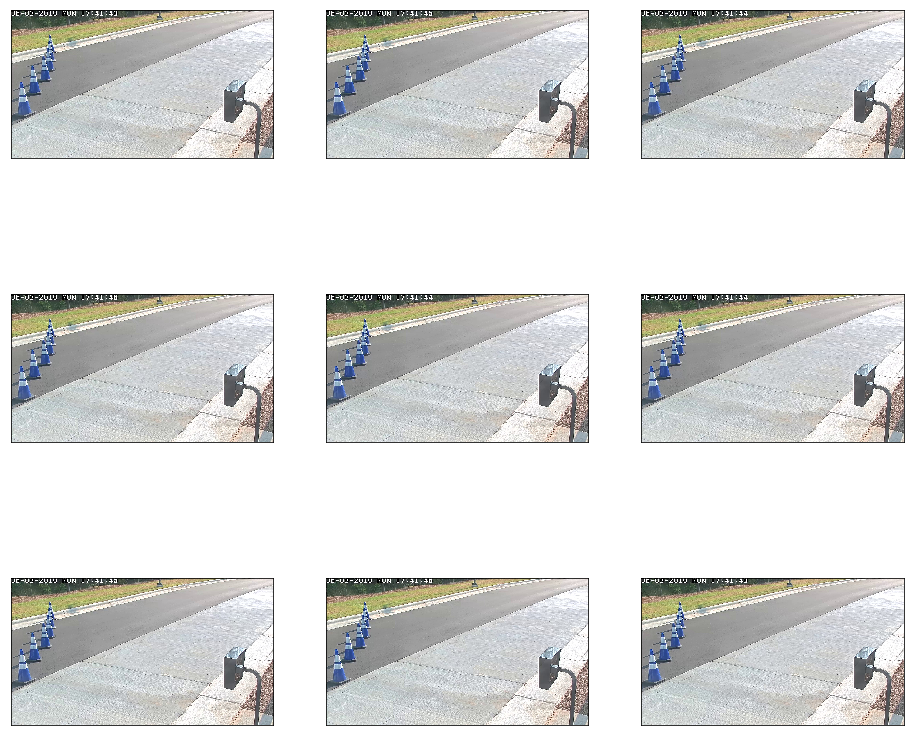

In [7]:
# visualize some of the loaded frames
my_images.show(nimages=9, ncol=3, randomize=True)

In [8]:
# resize the images to 224 x 224
my_images.resize(width=224)

In [9]:
# summary after the resize
my_images.image_summary

jpg                    17
minWidth              224
maxWidth              224
minHeight             224
maxHeight             224
meanWidth             224
meanHeight            224
mean1stChannel    182.316
min1stChannel           0
max1stChannel         255
mean2ndChannel    185.411
min2ndChannel           0
max2ndChannel         255
mean3rdChannel    184.632
min3rdChannel           0
max3rdChannel         255
dtype: object

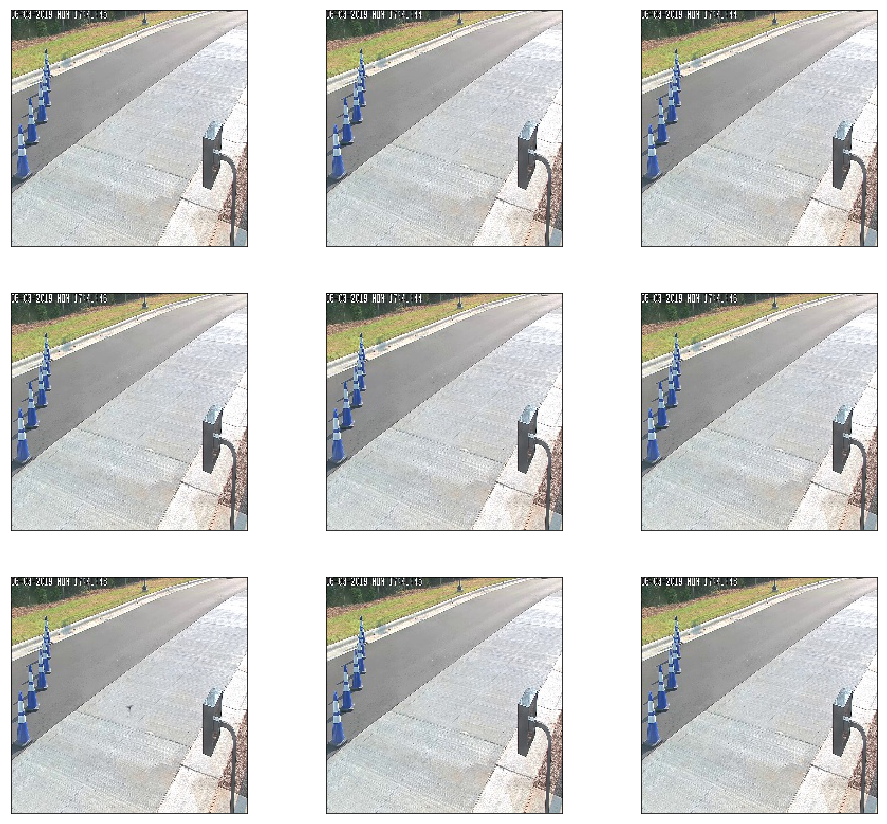

In [10]:
# visualize again
my_images.show(nimages=9, ncol=3, randomize=True)

In [11]:
# applying some mutations at random meanining that some of the images get a random mutation
# and write those to the resulting table.
# this operation is sometimes used to upsample the data
my_images.random_mutations(darken=True,
                           horizontal_flip=True,
                           invert_pixels=True,
                           pyramid_down=True,
                           rotate_left=True,
                           rotate_right=True,
                           sharpen=True,
                           vertical_flip=True)

In [12]:
# summary after the mutations
my_images.image_summary

jpg                   102
minWidth              224
maxWidth              224
minHeight             224
maxHeight             224
meanWidth             224
meanHeight            224
mean1stChannel    178.263
min1stChannel           0
max1stChannel         255
mean2ndChannel    181.486
min2ndChannel           0
max2ndChannel         255
mean3rdChannel    180.614
min3rdChannel           0
max3rdChannel         255
dtype: object

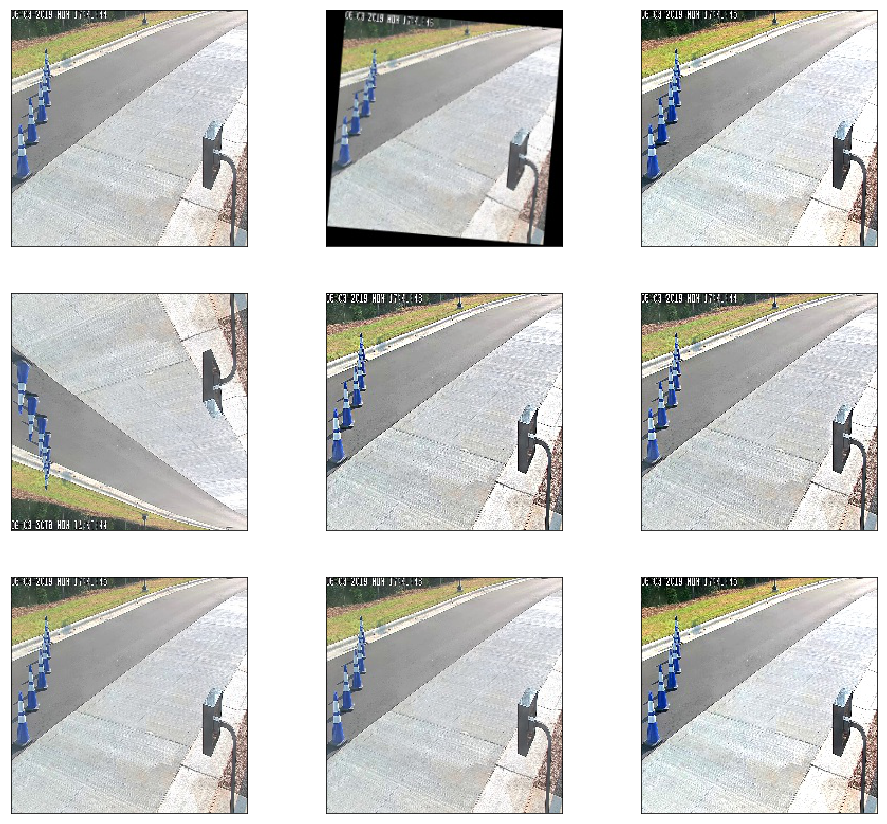

In [13]:
# visualize again
my_images.show(nimages=9, ncol=3, randomize=True)

In [14]:
# end the session
s.endsession()

+ Elapsed: 8.9e-05s, mem: 0.204mb